# Training a CNN for Image Classification

This is an example of defining and training a CNN to deal with a real-world image classification. These are images taken from Cifar 10 dataset found in Keras datasets module.



In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import tensorflow as tf

### Load the data into training and testing sets

In [4]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
np.unique(train_labels) #labels are 0 to 9, 10 classes total

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
train_images.shape #images are 32x32x3

(50000, 32, 32, 3)

In [7]:
test_images.shape

(10000, 32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

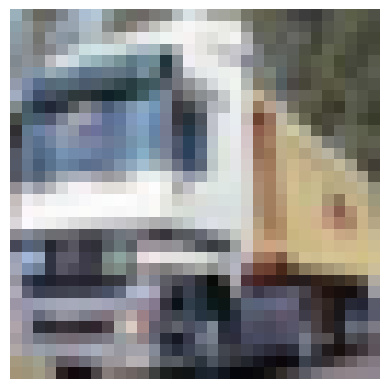

In [8]:
train_images[1]

plt.imshow(train_images[1].astype("uint8"))
plt.axis("off")

### Data Augmentation

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

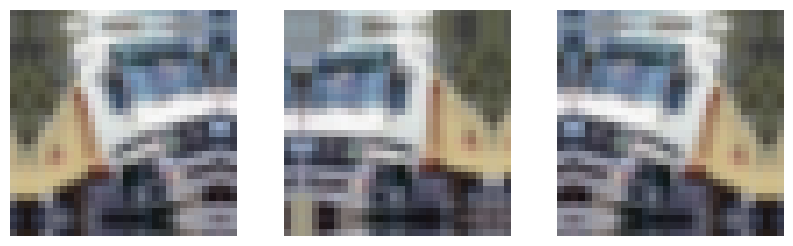

In [10]:
plt.figure(figsize=(10, 10))

for i in range(3):
    image = train_images[1]
    image = np.expand_dims(image, axis=0)
    augmented_image = data_augmentation(image)[0]

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis("off")

plt.show()

### Definning the model

In [11]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [12]:
model = tf.keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,738 (444.29 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Note that running the training on a CPU could take about 30 minutes.

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_cifar10.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=callbacks)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.2991 - loss: 1.9047 - val_accuracy: 0.4856 - val_loss: 1.4406
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 62ms/step - accuracy: 0.4689 - loss: 1.4818 - val_accuracy: 0.5052 - val_loss: 1.3870
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 63ms/step - accuracy: 0.5117 - loss: 1.3706 - val_accuracy: 0.5661 - val_loss: 1.2377
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5314 - loss: 1.3021 - val_accuracy: 0.5443 - val_loss: 1.3054
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 63ms/step - accuracy: 0.5520 - loss: 1.2583 - val_accuracy: 0.5979 - val_loss: 1.1456
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.5671 - loss: 1.2282 - val_accuracy: 0.5877 - val_loss: 1.1830
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 63ms/step - accuracy: 0.5765 - loss: 1.1999 - val_accuracy: 0.6347 - val_loss: 1.0361
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0

**Displaying curves of loss and accuracy during training**

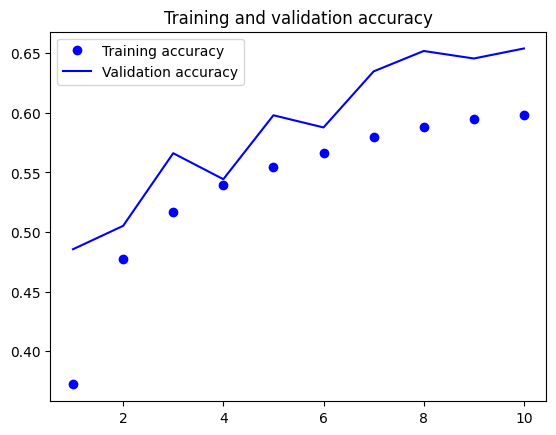

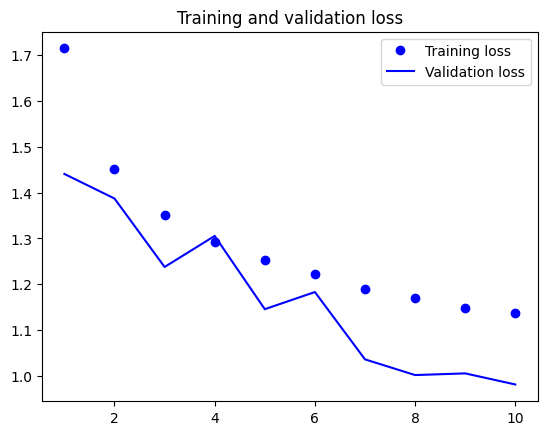

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [18]:
test_model = keras.models.load_model("./models/convnet_from_cifar10.keras")
test_loss, test_acc = test_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6566 - loss: 0.9663
Test accuracy: 0.654
